In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Show all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"shape of {var}: {dataset.variables[var].shape}")

shape of age: (10000, 40)
shape of circum_per_level: (10000, 40, 160)
shape of cloud_base_area: (10000, 40)
shape of eff_radius_per_level: (10000, 40, 160)
shape of height: (160,)
shape of location_x: (10000, 40)
shape of location_y: (10000, 40)
shape of location_z: (10000, 40)
shape of mass_flux: (10000, 40)
shape of mass_flux_per_level: (10000, 40, 160)
shape of max_height: (10000, 40)
shape of max_w: (10000, 40)
shape of max_w_cloud_base: (10000, 40)
shape of ql_flux: (10000, 40)
shape of size: (10000, 40)
shape of surface_area: (10000, 40)
shape of temp_per_level: (10000, 40, 160)
shape of theta_outside_per_level: (10000, 40, 160)
shape of valid_track: (10000,)
shape of w_per_level: (10000, 40, 160)


# Mass Flux

Vertical distribution of mass flux for a single cloud

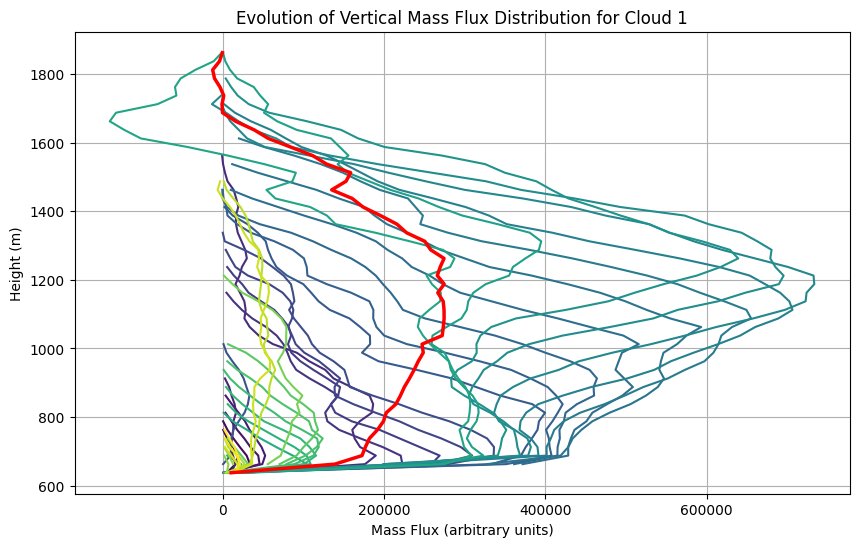

In [7]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the mass flux per level data for the specific cloud track
mass_flux_per_level = dataset.variables['mass_flux_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = mass_flux_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot mass flux distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(mass_flux_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(mass_flux_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average mass flux per level across all timesteps
average_mass_flux = np.nanmean(mass_flux_per_level, axis=1)
plt.plot(average_mass_flux, heights, label='Average', color='red', linewidth=2.5)

plt.xlabel('Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title(f'Evolution of Vertical Mass Flux Distribution for Cloud {cloud_index+1}')
plt.grid(True)
#plt.legend()
plt.show()

dataset.close()


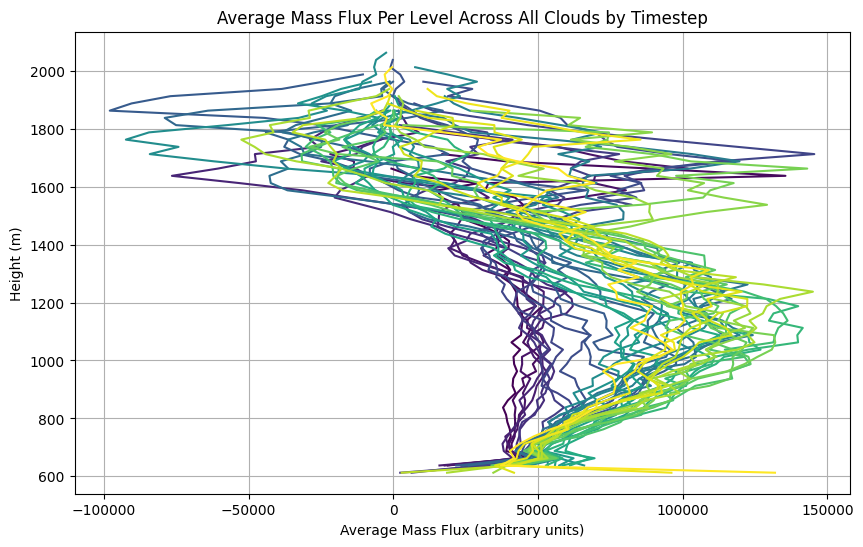

In [9]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read mass flux per level for all clouds and timesteps
mass_flux_per_level_all = dataset.variables['mass_flux_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = mass_flux_per_level_all.shape[1]
num_tracks = mass_flux_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average mass flux per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    mass_flux_at_timestep = mass_flux_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_mass_flux_at_timestep = np.nanmean(mass_flux_at_timestep, axis=0)

    # Plot this average mass flux against height levels
    plt.plot(average_mass_flux_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title('Average Mass Flux Per Level Across All Clouds by Timestep')
plt.grid(True)
#plt.legend()
plt.show()

dataset.close()


# Temperature

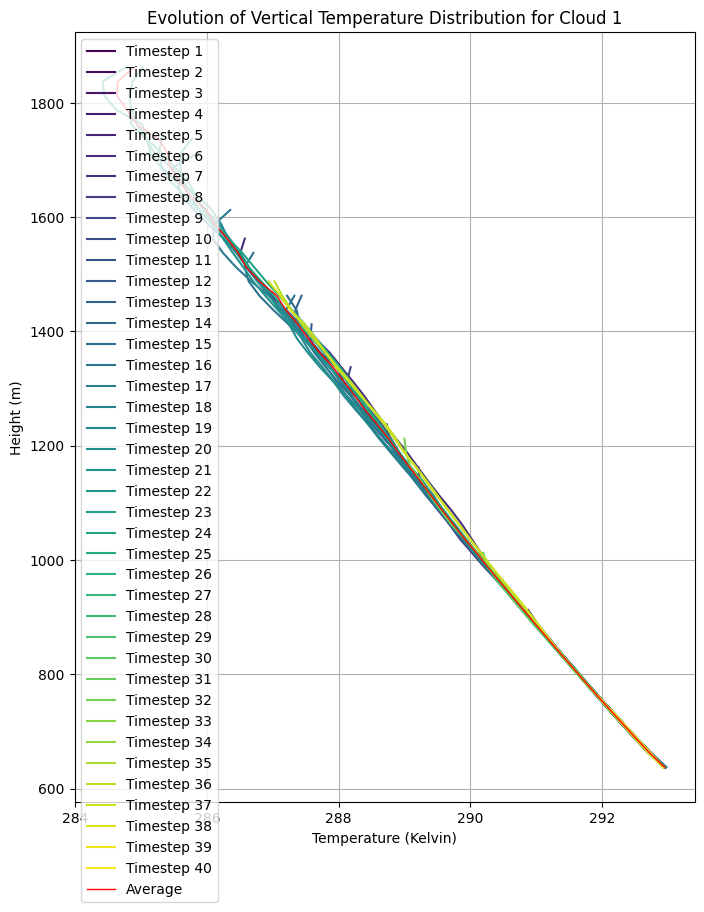

In [10]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the temp per level data for the specific cloud track
temp_per_level = dataset.variables['temp_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = temp_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 10))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot temperature distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(temp_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(temp_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average temperature per level across all timesteps
average_temp = np.nanmean(temp_per_level, axis=1)
plt.plot(average_temp, heights, label='Average', color='red', linewidth=1)

plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Height (m)')
plt.title(f'Evolution of Vertical Temperature Distribution for Cloud {cloud_index+1}')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


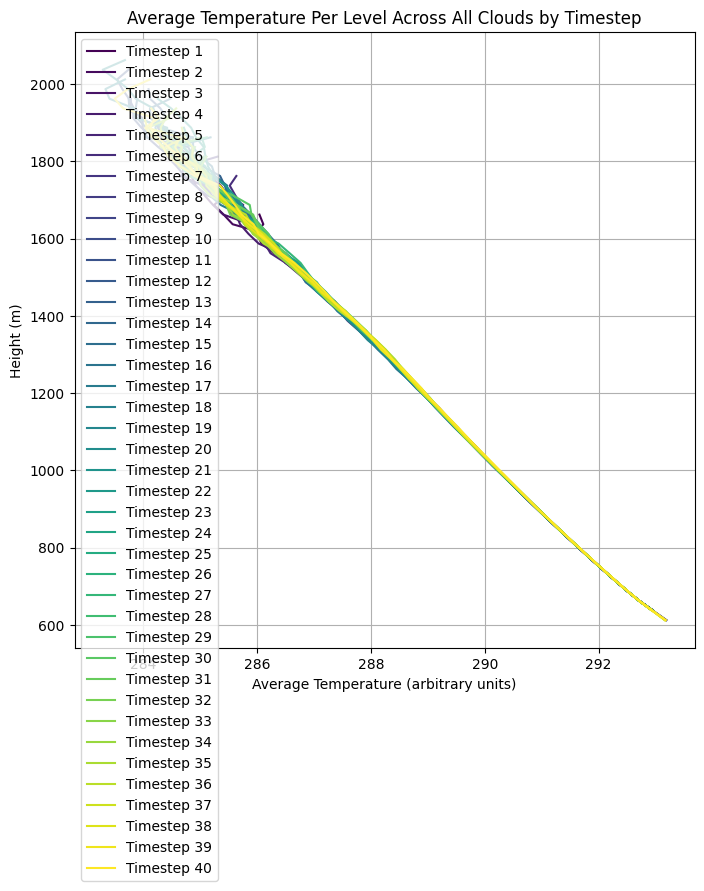

In [12]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read temperature per level for all clouds and timesteps
temp_per_level_all = dataset.variables['temp_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = temp_per_level_all.shape[1]
num_tracks = temp_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 8))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average temperature per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    temp_at_timestep = temp_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_temp_at_timestep = np.nanmean(temp_at_timestep, axis=0)

    # Plot this average temperature against height levels
    plt.plot(average_temp_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Temperature (arbitrary units)')
plt.ylabel('Height (m)')
plt.title('Average Temperature Per Level Across All Clouds by Timestep')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


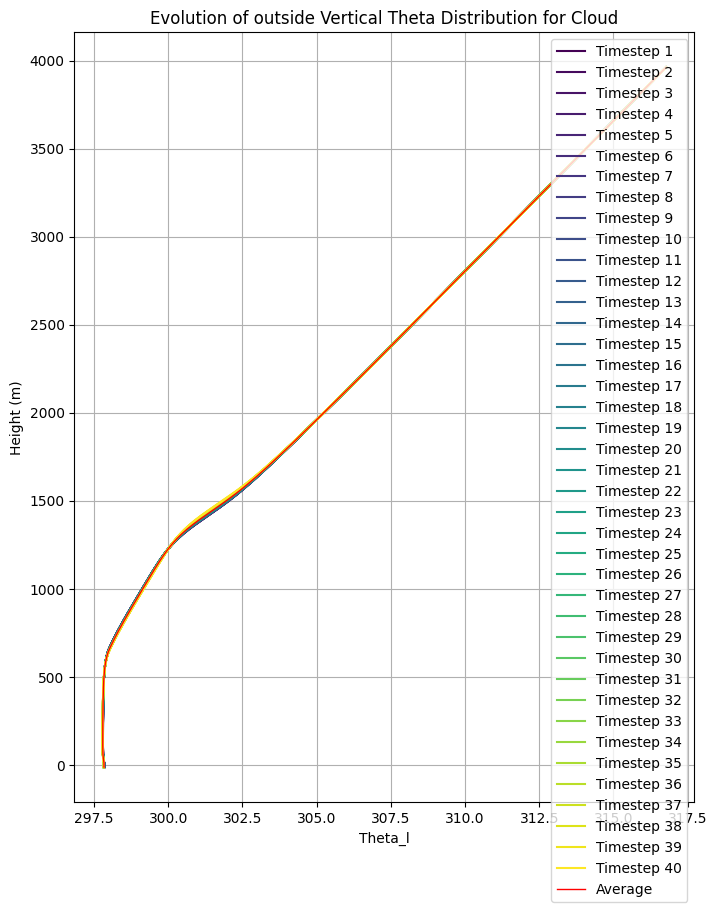

In [11]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the temp per level data for the specific cloud track
temp_per_level = dataset.variables['theta_outside_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = temp_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 10))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot temperature distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(temp_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(temp_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average temperature per level across all timesteps
average_temp = np.nanmean(temp_per_level, axis=1)
plt.plot(average_temp, heights, label='Average', color='red', linewidth=1)

plt.xlabel('Theta_l')
plt.ylabel('Height (m)')
plt.title(f'Evolution of outside Vertical Theta Distribution for Cloud')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


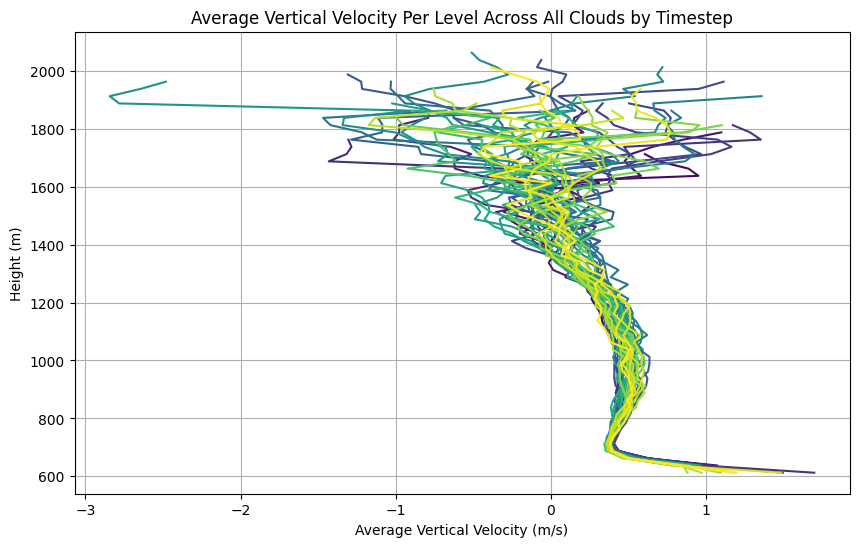

In [13]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read vertical velocity per level for all clouds and timesteps
w_per_level_all = dataset.variables['w_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = w_per_level_all.shape[1]
num_tracks = w_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average vertical velocity per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    w_at_timestep = w_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_w_at_timestep = np.nanmean(w_at_timestep, axis=0)

    # Plot this average vertical velocity against height levels
    plt.plot(average_w_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Vertical Velocity (m/s)')
plt.ylabel('Height (m)')
plt.title('Average Vertical Velocity Per Level Across All Clouds by Timestep')
plt.grid(True)
#plt.legend()
plt.show()

dataset.close()


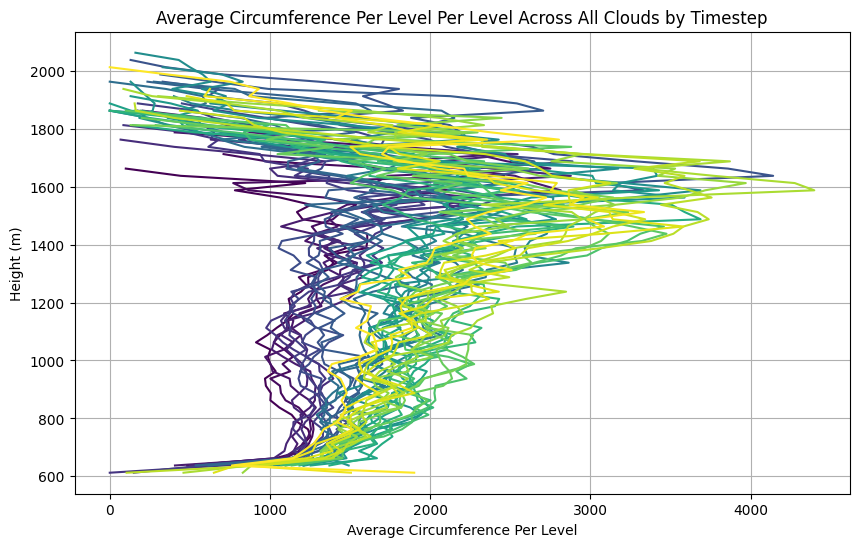

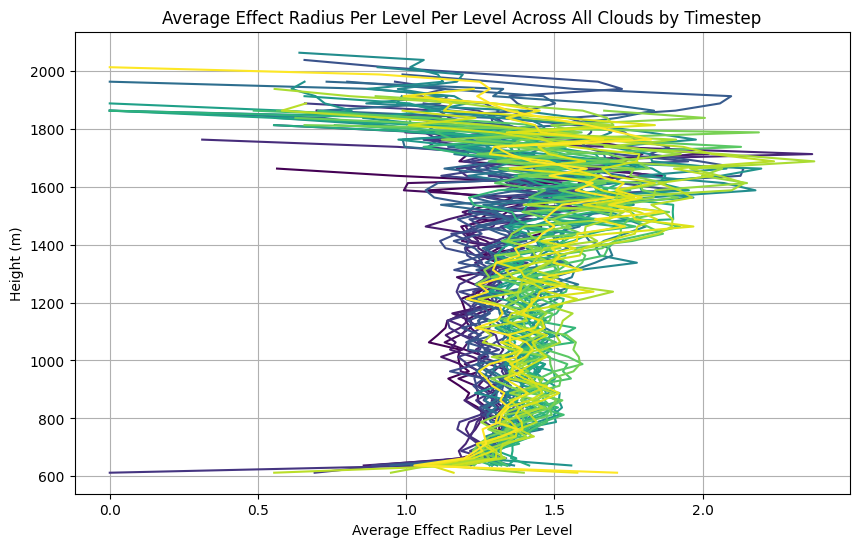

In [14]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read circum_per_level and effect_radius_per_level for all clouds and timesteps
circum_per_level_all = dataset.variables['circum_per_level'][:]
effect_radius_per_level_all = dataset.variables['eff_radius_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = circum_per_level_all.shape[1]
num_tracks = circum_per_level_all.shape[0]

# Function to plot the data
def plot_variable(variable_data, variable_name, ylabel):
    plt.figure(figsize=(10, 6))

    # Generate a color map for the different timesteps
    colors = cm.viridis(np.linspace(0, 1, num_timesteps))

    # Loop through each timestep to calculate and plot the average of the variable per level across all clouds
    for timestep in range(num_timesteps):
        # Extract data for the current timestep from all tracks
        data_at_timestep = variable_data[:, timestep, :]

        # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
        average_data_at_timestep = np.nanmean(data_at_timestep, axis=0)

        # Plot this average against height levels
        plt.plot(average_data_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

    plt.xlabel(f'Average {variable_name}')
    plt.ylabel(ylabel)
    plt.title(f'Average {variable_name} Per Level Across All Clouds by Timestep')
    plt.grid(True)
    #plt.legend()
    plt.show()

# Plot circum_per_level
plot_variable(circum_per_level_all, 'Circumference Per Level', 'Height (m)')

# Plot effect_radius_per_level
plot_variable(effect_radius_per_level_all, 'Effect Radius Per Level', 'Height (m)')

dataset.close()


# Lifetime
## Effective cloud radius

In [15]:
# First, display available cloud tracks
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import math

# Open the dataset
nc_file = '../cloud_results.nc'
dataset = Dataset(nc_file, 'r')

# Find and list valid cloud tracks
valid_tracks = []
track_count = dataset.dimensions['track'].size

print("Available cloud tracks:")
print("-" * 50)
for track_idx in range(track_count):
    # Check if this track has any valid data
    size_data = dataset.variables['size'][track_idx, :]
    valid_timesteps = np.where(~np.isnan(size_data))[0]
    
    if len(valid_timesteps) > 0:  # If track has data
        max_height = np.nanmax(dataset.variables['max_height'][track_idx, :])
        lifetime = len(valid_timesteps)
        valid_tracks.append(track_idx)
        print(f"Cloud {track_idx}: Max Height={max_height:.0f}m, Lifetime={lifetime} timesteps")

print("-" * 50)
print(f"Found {len(valid_tracks)} valid cloud tracks")

Available cloud tracks:
--------------------------------------------------
Cloud 0: Max Height=1862m, Lifetime=40 timesteps
Cloud 1: Max Height=1512m, Lifetime=21 timesteps
Cloud 2: Max Height=2062m, Lifetime=40 timesteps
Cloud 3: Max Height=1738m, Lifetime=32 timesteps
Cloud 4: Max Height=1762m, Lifetime=40 timesteps
Cloud 5: Max Height=1562m, Lifetime=17 timesteps
Cloud 6: Max Height=2038m, Lifetime=40 timesteps
Cloud 7: Max Height=1862m, Lifetime=40 timesteps
Cloud 8: Max Height=1012m, Lifetime=18 timesteps
Cloud 9: Max Height=1462m, Lifetime=18 timesteps
Cloud 10: Max Height=1562m, Lifetime=40 timesteps
Cloud 11: Max Height=1088m, Lifetime=15 timesteps
Cloud 12: Max Height=1212m, Lifetime=5 timesteps
Cloud 13: Max Height=862m, Lifetime=6 timesteps
Cloud 14: Max Height=738m, Lifetime=7 timesteps
Cloud 15: Max Height=738m, Lifetime=1 timesteps
Cloud 16: Max Height=712m, Lifetime=2 timesteps
Cloud 17: Max Height=1438m, Lifetime=18 timesteps
Cloud 18: Max Height=1488m, Lifetime=40 time

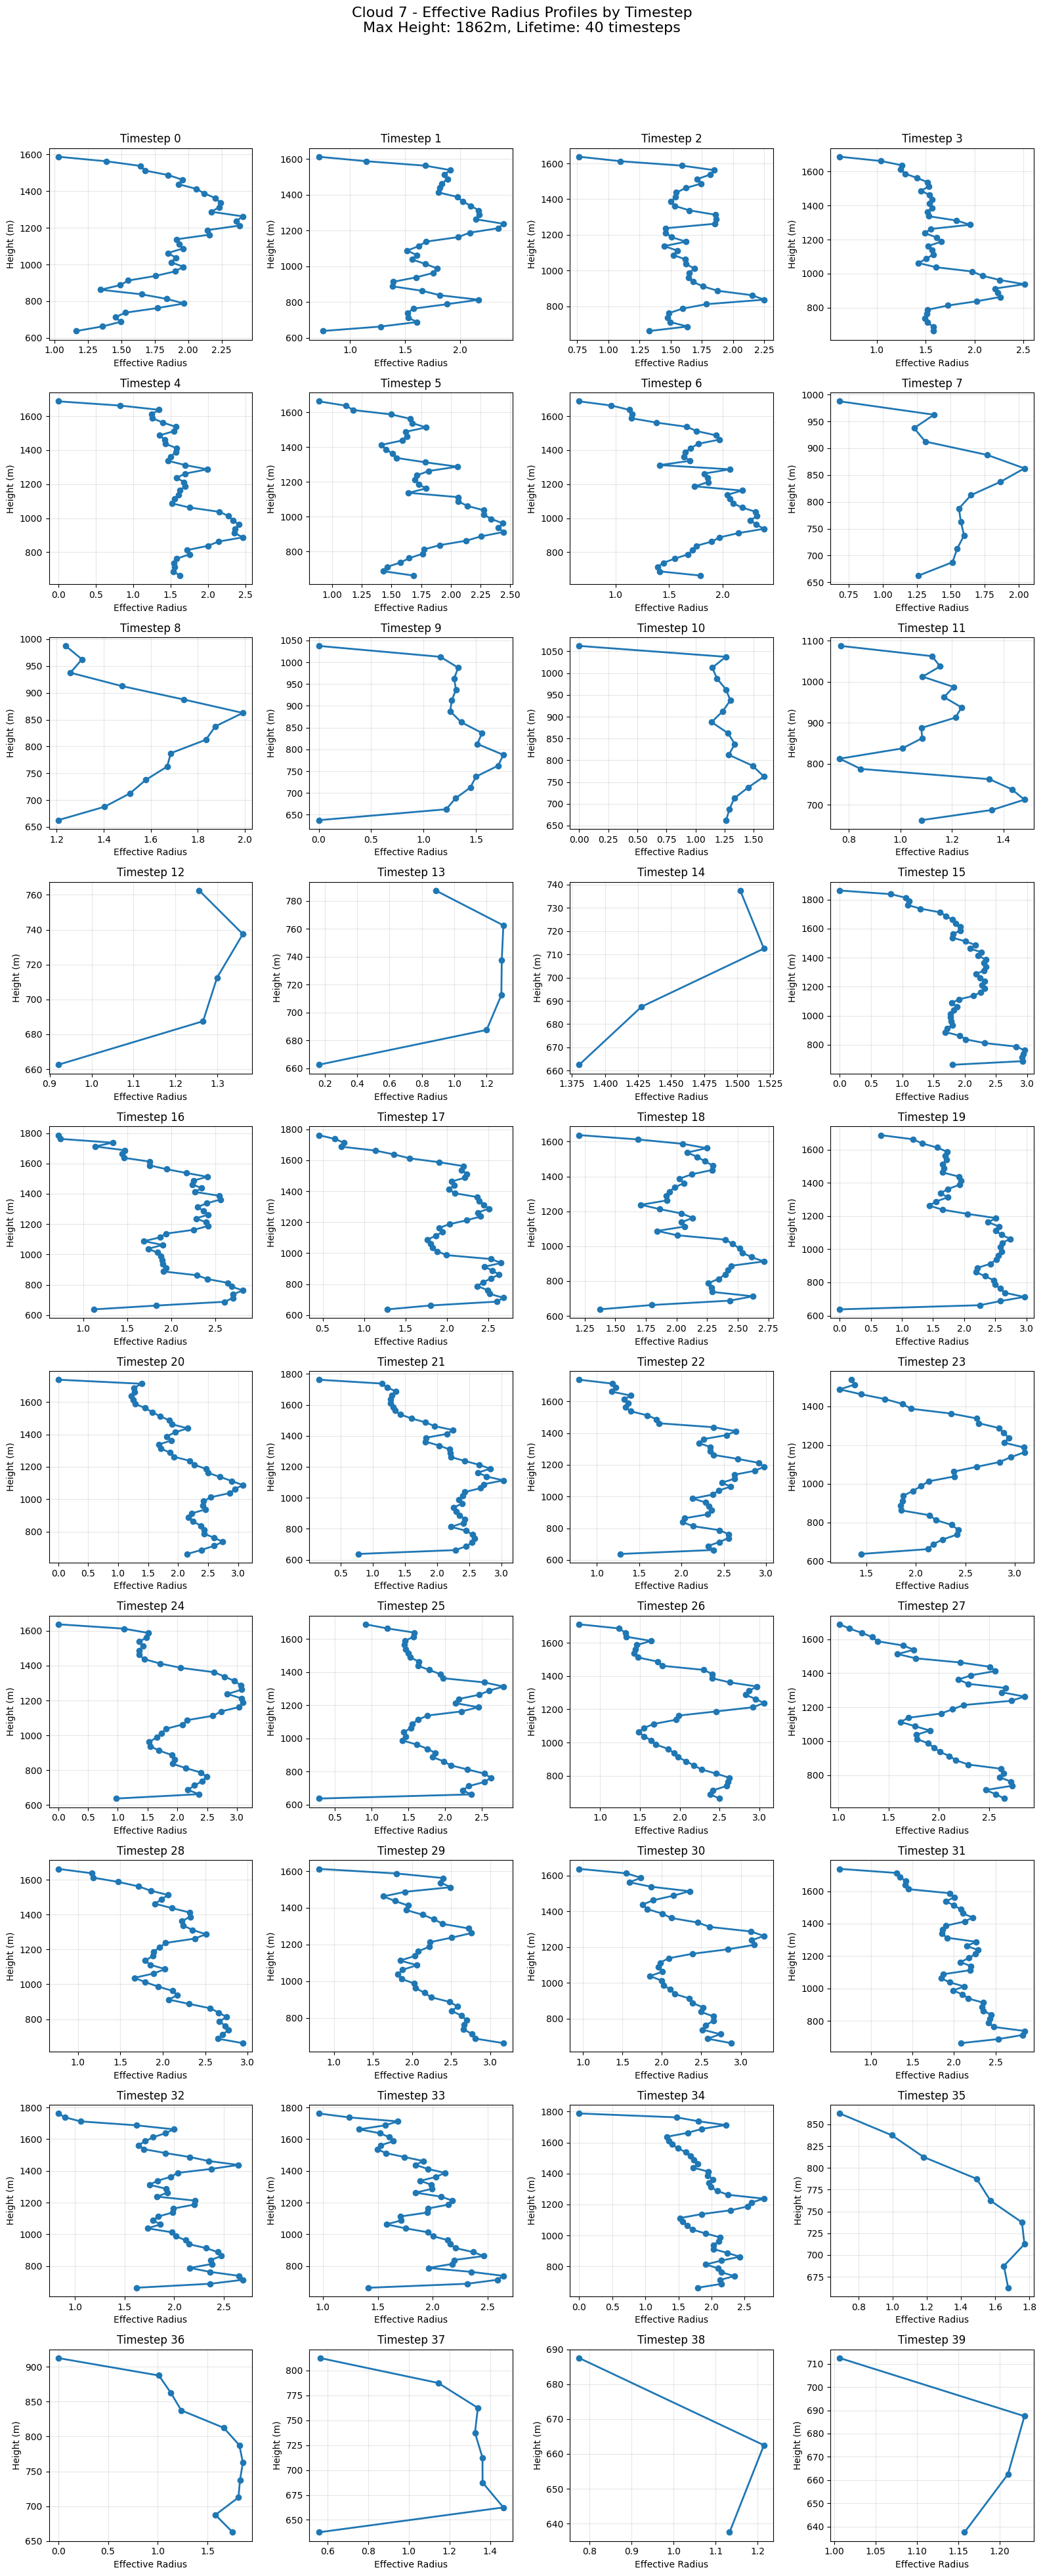

In [16]:
# Set the cloud index you want to analyze
cloud_idx = 7  # Change this to the cloud ID you want to visualize

# Get data for this cloud
eff_radius = dataset.variables['eff_radius_per_level'][cloud_idx, :, :].T  # (level, time)
heights = dataset.variables['height'][:]

# Find timesteps where this cloud exists
size_data = dataset.variables['size'][cloud_idx, :]
valid_timesteps = np.where(~np.isnan(size_data))[0]

if len(valid_timesteps) == 0:
    print("No data available for this cloud")
else:
    # Determine layout for subplots
    n_plots = len(valid_timesteps)
    cols = min(4, n_plots)  # Maximum 4 columns
    rows = math.ceil(n_plots / cols)  # Ceiling division
    
    # Create figure with subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    
    # Handle case of single row or single column grid
    if rows == 1 and cols == 1:
        axs = np.array([[axs]])
    elif rows == 1:
        axs = axs.reshape(1, -1)
    elif cols == 1:
        axs = axs.reshape(-1, 1)
    
    # Plot effective radius for each timestep
    for i, timestep in enumerate(valid_timesteps):
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        
        # Get effective radius data for this timestep
        er_profile = eff_radius[:, timestep]
        
        # Skip if all values are NaN
        if np.all(np.isnan(er_profile)):
            ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"Timestep {timestep}")
            continue
        
        # Find where we have valid data
        valid_mask = ~np.isnan(er_profile)
        valid_heights = heights[valid_mask]
        valid_er = er_profile[valid_mask]
        
        # Plot
        ax.plot(valid_er, valid_heights, 'o-', linewidth=2)
        ax.set_xlabel('Effective Radius')
        ax.set_ylabel('Height (m)')
        ax.set_title(f"Timestep {timestep}")
        ax.grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(valid_timesteps), rows*cols):
        row = i // cols
        col = i % cols
        fig.delaxes(axs[row, col])
    
    # Add an overall title
    cloud_info = f"Cloud {cloud_idx} - Effective Radius Profiles by Timestep"
    max_height = np.nanmax(dataset.variables['max_height'][cloud_idx, :])
    lifetime = len(valid_timesteps)
    info_text = f"Max Height: {max_height:.0f}m, Lifetime: {lifetime} timesteps"
    fig.suptitle(f"{cloud_info}\n{info_text}", fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle
    plt.show()

# Importing data and filtering to remove partial lifetimes 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Load dataset and create a mask of valid tracks
with Dataset(nc_file, 'r') as dataset:
    # Check if valid_track exists (in case you're using an older file)
    if 'valid_track' in dataset.variables:
        # Create mask of valid tracks (where valid_track == 1)
        valid_mask = dataset.variables['valid_track'][:] == 1
        num_valid = np.sum(valid_mask)
        num_total = len(valid_mask)
        print(f"Using {num_valid} valid tracks out of {num_total} total tracks ({num_valid/num_total*100:.1f}%)")
    else:
        print("Warning: 'valid_track' variable not found. Using all tracks.")
        valid_mask = np.ones(dataset.dimensions['track'].size, dtype=bool)
        
    # Example: Load data you want to analyze, filtering by valid tracks only
    # For variables with dimensions (track, time, ...)
    size = dataset.variables['size'][:][valid_mask, :]
    max_height = dataset.variables['max_height'][:][valid_mask, :]
    
    # For any other variable you want to analyze
    # Replace 'variable_name' with the actual variable name
    # my_var = dataset.variables['variable_name'][:][valid_mask, ...]

Using 9500 valid tracks out of 10000 total tracks (95.0%)


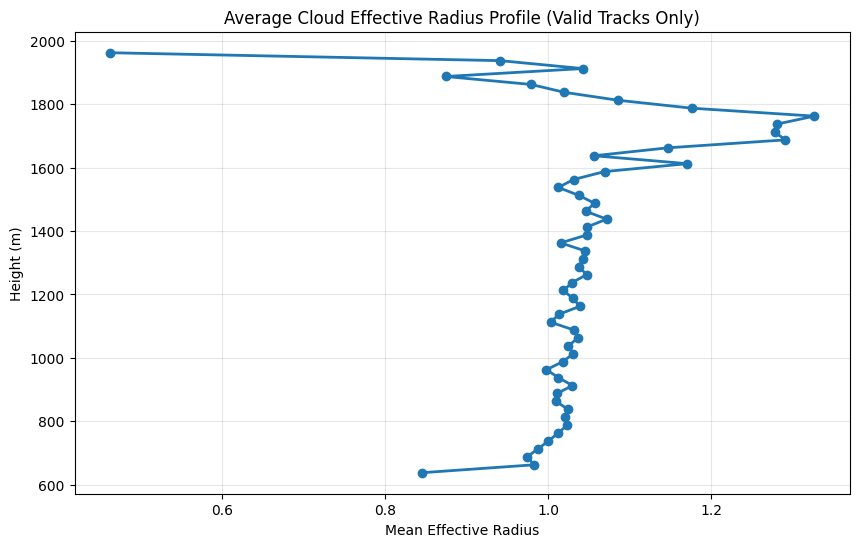

In [18]:
# Load all necessary data with the valid_mask filter
with Dataset(nc_file, 'r') as dataset:
    # Get valid tracks mask
    valid_mask = dataset.variables['valid_track'][:] == 1
    
    # Load filtered data
    eff_radius = dataset.variables['eff_radius_per_level'][:][valid_mask, :, :]  # (track, time, level)
    heights = dataset.variables['height'][:]
    
    # For example, to plot the mean effective radius profile across all valid tracks
    # First, find non-NaN values at each height level
    valid_data = ~np.isnan(eff_radius)
    
    # Calculate mean, ignoring NaN values
    mean_eff_radius = np.nanmean(eff_radius, axis=(0, 1))  # Average over tracks and time
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(mean_eff_radius, heights, 'o-', linewidth=2)
    plt.xlabel('Mean Effective Radius')
    plt.ylabel('Height (m)')
    plt.title('Average Cloud Effective Radius Profile (Valid Tracks Only)')
    plt.grid(True, alpha=0.3)

Using 9500 complete-lifetime tracks out of 10000 total tracks


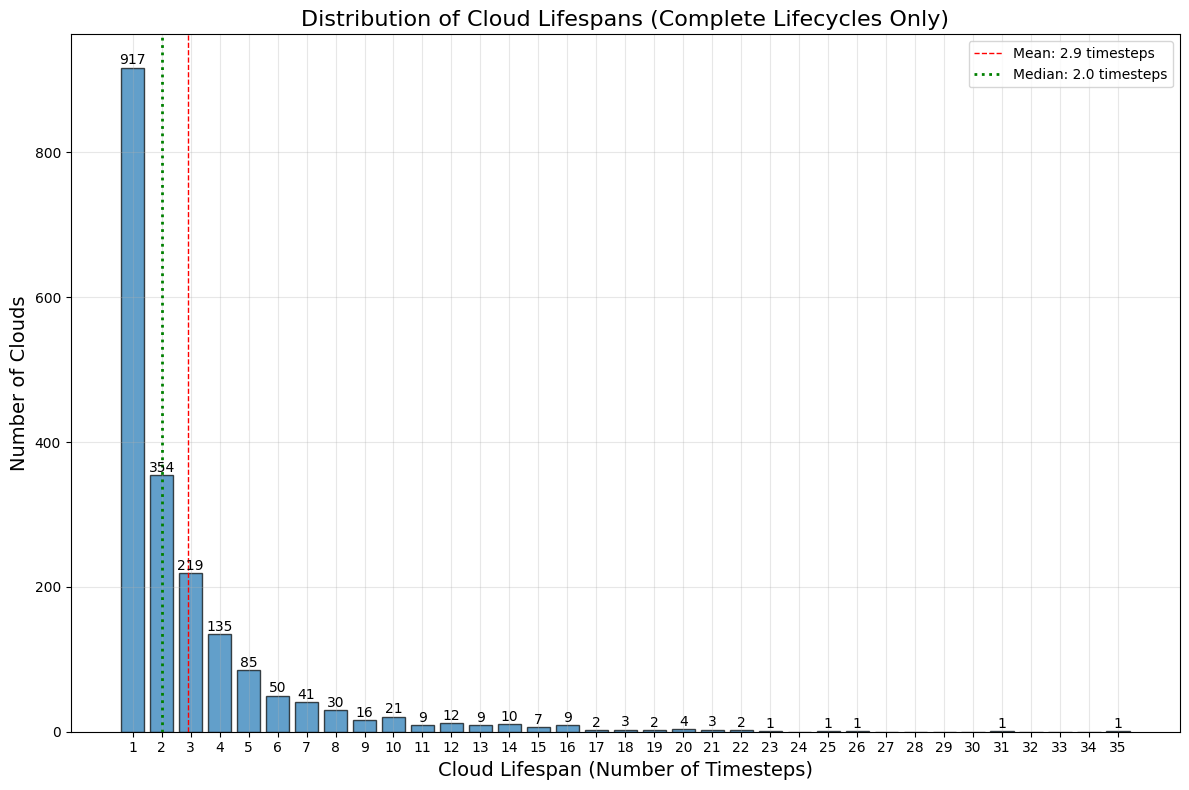

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file

with Dataset(nc_file, 'r') as dataset:
    # Get valid tracks (complete lifetimes only)
    valid_tracks = dataset.variables['valid_track'][:] == 1
    print(f"Using {np.sum(valid_tracks)} complete-lifetime tracks out of {len(valid_tracks)} total tracks")
    
    # Read cloud ages for valid tracks
    age_data = dataset.variables['age'][:][valid_tracks, :]
    
    # Calculate cloud lifespans (how many timesteps each cloud lives)
    cloud_lifespans = []
    
    for track_idx in range(age_data.shape[0]):
        # Get ages for this track, ignoring missing values (-1)
        track_ages = age_data[track_idx, :]
        valid_ages = track_ages[track_ages >= 0]
        
        if len(valid_ages) > 0:
            # Maximum age + 1 = number of timesteps the cloud lived
            # (+1 because age starts at 0)
            lifespan = np.max(valid_ages) + 1
            cloud_lifespans.append(lifespan)
    
    cloud_lifespans = np.array(cloud_lifespans)

# Create the histogram
plt.figure(figsize=(12, 8))
max_lifespan = int(np.max(cloud_lifespans)) if len(cloud_lifespans) > 0 else 0
bins = range(1, max_lifespan + 2)  # +2 because range is exclusive and we want to include the max value

# Plot the histogram
if len(cloud_lifespans) > 0:
    counts, edges, _ = plt.hist(cloud_lifespans, bins=bins, align='left', alpha=0.7, 
                               edgecolor='black', rwidth=0.8)
    
    # Add count labels above each bar
    for i, count in enumerate(counts):
        if count > 0:  # Only add label if there are clouds with this lifespan
            plt.text(i + 1, count + 0.1, str(int(count)), 
                     horizontalalignment='center', verticalalignment='bottom')
    
    # Calculate statistics
    mean_lifespan = np.mean(cloud_lifespans)
    median_lifespan = np.median(cloud_lifespans)
    
    # Add statistics to the plot
    plt.axvline(mean_lifespan, color='red', linestyle='dashed', linewidth=1, 
               label=f'Mean: {mean_lifespan:.1f} timesteps')
    plt.axvline(median_lifespan, color='green', linestyle='dotted', linewidth=2, 
               label=f'Median: {median_lifespan:.1f} timesteps')
    
    plt.xlabel('Cloud Lifespan (Number of Timesteps)', fontsize=14)
    plt.ylabel('Number of Clouds', fontsize=14)
    plt.title('Distribution of Cloud Lifespans (Complete Lifecycles Only)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, max_lifespan + 1))
    plt.legend()
else:
    plt.text(0.5, 0.5, "No valid cloud data available", 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=14)

plt.tight_layout()
plt.show()

## Maximum cloud height (across lifetime)

Using 9500 complete-lifetime tracks out of 10000 total tracks


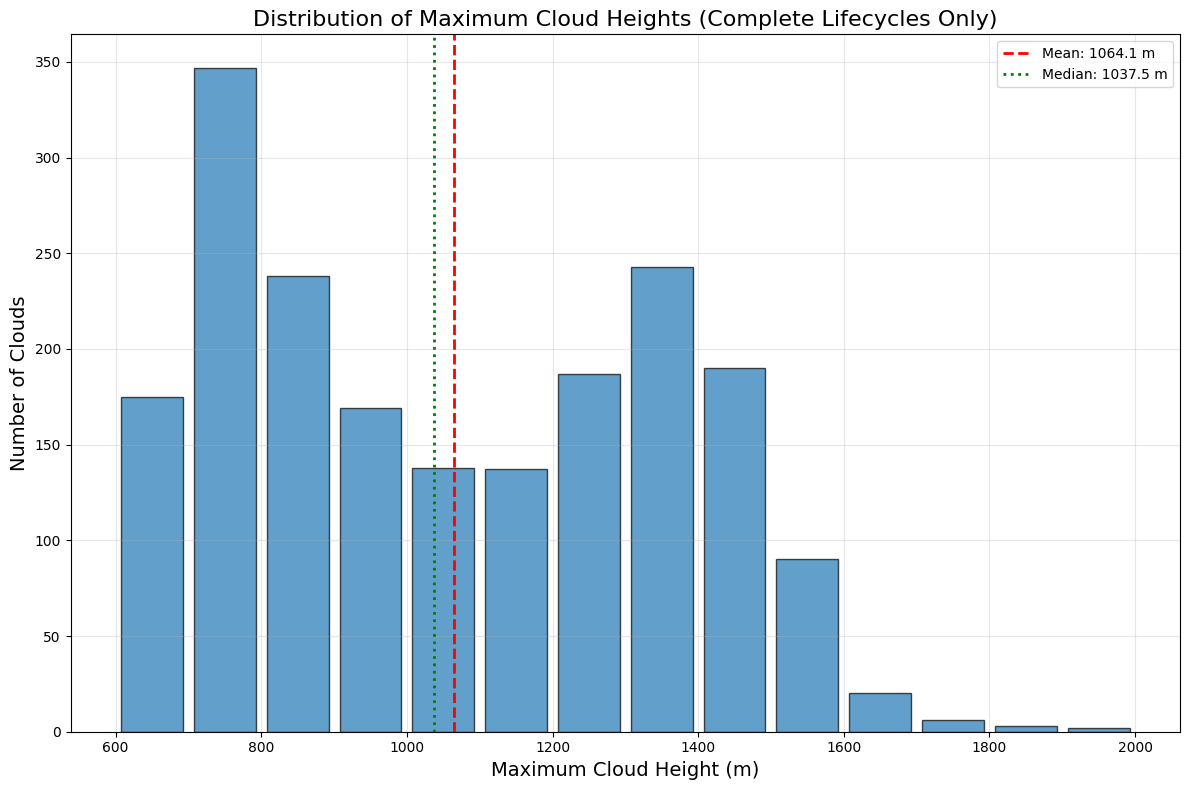

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file

with Dataset(nc_file, 'r') as dataset:
    # Get valid tracks (complete lifetimes only)
    valid_tracks = dataset.variables['valid_track'][:] == 1
    print(f"Using {np.sum(valid_tracks)} complete-lifetime tracks out of {len(valid_tracks)} total tracks")
    
    # Load max_height data for valid tracks
    max_height_data = dataset.variables['max_height'][:][valid_tracks, :]
    
    # Find the maximum height each cloud reached during its lifetime
    cloud_max_heights = []
    
    for track_idx in range(max_height_data.shape[0]):
        # Get all height values for this track
        track_heights = max_height_data[track_idx, :]
        
        # Filter out NaN values (timesteps when cloud doesn't exist)
        valid_heights = track_heights[~np.isnan(track_heights)]
        
        if len(valid_heights) > 0:
            # Find the maximum height for this cloud across all timesteps
            lifetime_max_height = np.max(valid_heights)
            cloud_max_heights.append(lifetime_max_height)
    
    cloud_max_heights = np.array(cloud_max_heights)

# Create the histogram
plt.figure(figsize=(12, 8))

# Plot the histogram
if len(cloud_max_heights) > 0:
    # Convert from model levels to meters if needed
    # You might need to adjust bin width based on your data range
    bin_width = 100  # meters
    min_height = np.floor(np.min(cloud_max_heights) / bin_width) * bin_width
    max_height = np.ceil(np.max(cloud_max_heights) / bin_width) * bin_width
    bins = np.arange(min_height, max_height + bin_width, bin_width)
    
    counts, edges, patches = plt.hist(cloud_max_heights, bins=bins, alpha=0.7, 
                                     edgecolor='black', rwidth=0.85)
    
    # Calculate statistics
    mean_height = np.mean(cloud_max_heights)
    median_height = np.median(cloud_max_heights)
    
    # Add statistics to the plot
    plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, 
               label=f'Mean: {mean_height:.1f} m')
    plt.axvline(median_height, color='green', linestyle='dotted', linewidth=2, 
               label=f'Median: {median_height:.1f} m')
    
    plt.xlabel('Maximum Cloud Height (m)', fontsize=14)
    plt.ylabel('Number of Clouds', fontsize=14)
    plt.title('Distribution of Maximum Cloud Heights (Complete Lifecycles Only)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend()
else:
    plt.text(0.5, 0.5, "No valid cloud data available", 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=14)

plt.tight_layout()
plt.show()

# Age and vertical velocity location

Found 9500 clouds with full lifecycles
262 out of 9500
264 out of 9500
265 out of 9500
266 out of 9500
267 out of 9500
268 out of 9500
269 out of 9500
270 out of 9500
271 out of 9500
272 out of 9500
273 out of 9500
274 out of 9500
275 out of 9500
276 out of 9500
277 out of 9500
278 out of 9500
279 out of 9500
280 out of 9500
281 out of 9500
282 out of 9500
283 out of 9500
284 out of 9500
285 out of 9500
286 out of 9500
287 out of 9500
288 out of 9500
289 out of 9500
290 out of 9500
291 out of 9500
292 out of 9500
293 out of 9500
294 out of 9500
295 out of 9500
296 out of 9500
297 out of 9500
298 out of 9500
299 out of 9500
300 out of 9500
301 out of 9500
302 out of 9500
303 out of 9500
304 out of 9500
305 out of 9500
306 out of 9500
307 out of 9500
308 out of 9500
309 out of 9500
310 out of 9500
312 out of 9500
313 out of 9500
314 out of 9500
315 out of 9500
316 out of 9500
317 out of 9500
318 out of 9500
319 out of 9500
320 out of 9500
321 out of 9500
322 out of 9500
323 out of 9500
3

/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_24682/3826697362.py:111: RuntimeWarning: invalid value encountered in scalar divide
  df['normalized_age'] = df.apply(lambda row: row['age'] / cloud_max_ages[row['cloud_id']]


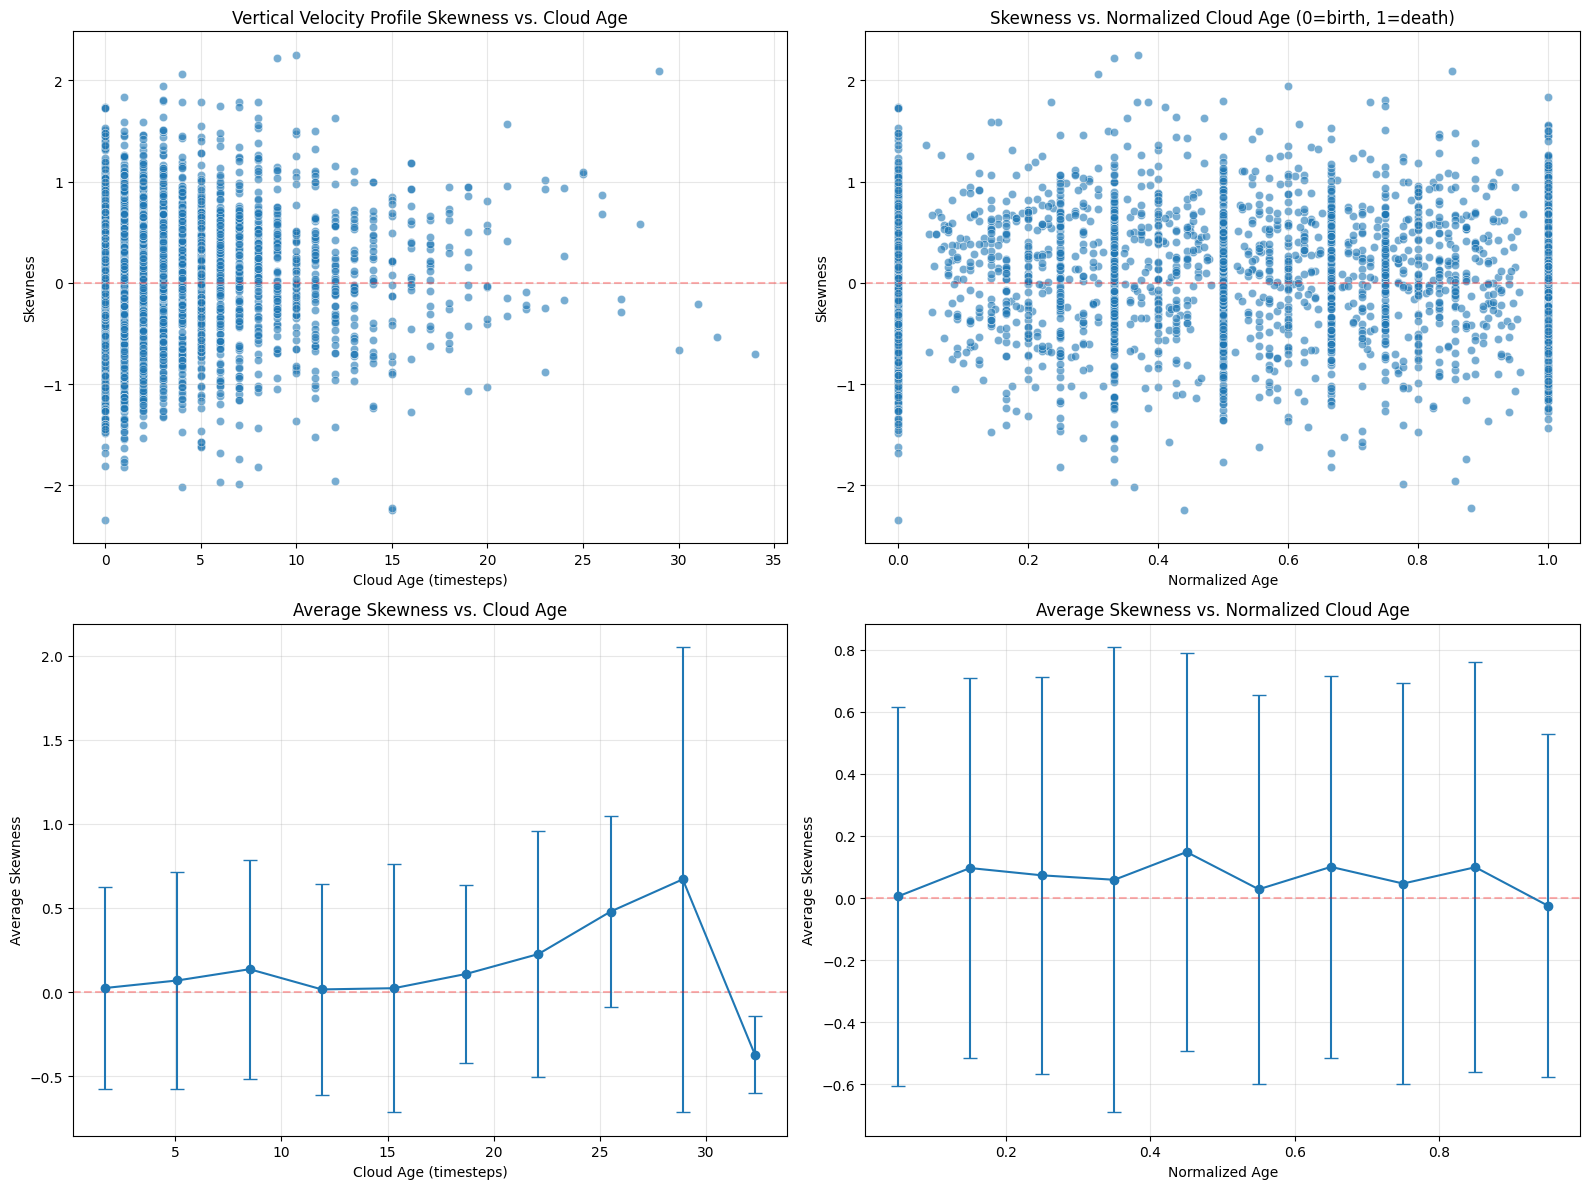

Total data points: 3871
Number of unique clouds: 1355
Average skewness: 0.043 ± 0.616
Skewness range: [-2.341, 2.255]
Mean cloud depth: 189.6 meters


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import pandas as pd
import seaborn as sns

# ===== Configuration =====
nc_file = '../cloud_results.nc'
min_lifetime_timesteps = 3  # Filter clouds that live less than this many timesteps
# =========================

# Open the dataset
dataset = Dataset(nc_file, 'r')

# Filter for full lifecycle clouds - convert masked array to numpy array
valid_track = np.array(dataset.variables['valid_track'][:])
full_lifetime_indices = np.where(valid_track == 1)[0]
print(f"Found {len(full_lifetime_indices)} clouds with full lifecycles")

# Get height levels - convert to numpy array
height_levels = np.array(dataset.variables['height'][:])

# Create storage for results
results = []

# Process each full lifecycle cloud
for cloud_idx in full_lifetime_indices:
    # print which cloud it's on out of all
    print (cloud_idx, "out of", len(full_lifetime_indices))
    # Get cloud age data and find valid timesteps
    age_data = np.array(dataset.variables['age'][cloud_idx, :])
    valid_timesteps = np.where(~np.isnan(age_data))[0]
    
    # Filter by minimum lifetime
    if len(valid_timesteps) < min_lifetime_timesteps:
        continue
    
    # Process each timestep for this cloud
    for t in valid_timesteps:
        # Get vertical velocity profile for this cloud at this timestep
        w_profile = np.array(dataset.variables['w_per_level'][cloud_idx, t, :])
        
        # Skip timestep if w_profile contains mostly NaN values
        if np.isnan(w_profile).sum() > len(w_profile) - 3:
            continue
        
        # Find cloud base and top (first and last non-NaN values)
        valid_levels = ~np.isnan(w_profile)
        if not np.any(valid_levels):
            continue
            
        cloud_base_idx = np.argmax(valid_levels)
        cloud_top_idx = len(valid_levels) - 1 - np.argmax(valid_levels[::-1])
        
        # Extract only the cloud part of the profile
        cloud_w_profile = w_profile[cloud_base_idx:cloud_top_idx+1]
        cloud_heights = height_levels[cloud_base_idx:cloud_top_idx+1]
        
        # Ensure we have enough points for meaningful analysis
        if len(cloud_w_profile) < 3:
            continue
            
        # Normalize heights to 0-1
        if len(cloud_heights) > 1:
            normalized_heights = (cloud_heights - cloud_heights[0]) / (cloud_heights[-1] - cloud_heights[0])
        else:
            continue  # Skip if not enough points for normalization
            
        # Calculate skewness of the vertical velocity profile
        skewness = stats.skew(cloud_w_profile)
        
        # Get maximum vertical velocity for this cloud at this timestep
        max_w = np.array(dataset.variables['max_w'][cloud_idx, t])
        
        # Store results
        results.append({
            'cloud_id': int(cloud_idx),
            'age': float(age_data[t]),
            'skewness': float(skewness),
            'max_w': float(max_w),
            'cloud_depth': float(cloud_heights[-1] - cloud_heights[0]),
            'timestep': int(t),
            'profile_length': int(len(cloud_w_profile))
        })

# Close the dataset after extraction
dataset.close()

# Convert results to DataFrame
df = pd.DataFrame(results)

if len(df) == 0:
    print("No valid data points found. Try adjusting the filtering criteria.")
    exit()

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Skewness vs Age scatter plot
sns.scatterplot(data=df, x='age', y='skewness', alpha=0.6, ax=axes[0,0])
axes[0,0].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[0,0].set_title('Vertical Velocity Profile Skewness vs. Cloud Age')
axes[0,0].set_xlabel('Cloud Age (timesteps)')
axes[0,0].set_ylabel('Skewness')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Skewness vs Normalized Age scatter plot
# Normalize age for each cloud (0 = birth, 1 = death)
cloud_max_ages = df.groupby('cloud_id')['age'].max()
df['normalized_age'] = df.apply(lambda row: row['age'] / cloud_max_ages[row['cloud_id']] 
                               if row['cloud_id'] in cloud_max_ages.index else np.nan, axis=1)

sns.scatterplot(data=df, x='normalized_age', y='skewness', alpha=0.6, ax=axes[0,1])
axes[0,1].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[0,1].set_title('Skewness vs. Normalized Cloud Age (0=birth, 1=death)')
axes[0,1].set_xlabel('Normalized Age')
axes[0,1].set_ylabel('Skewness')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Average skewness binned by age - using numpy histogram to avoid category issues
num_bins = 10
age_bins = np.linspace(0, df['age'].max(), num_bins + 1)
age_indices = np.digitize(df['age'], age_bins) - 1  # -1 to get 0-based indices
mean_skew = np.zeros(num_bins)
std_skew = np.zeros(num_bins)
bin_centers = (age_bins[:-1] + age_bins[1:]) / 2

for i in range(num_bins):
    bin_data = df['skewness'][age_indices == i]
    if len(bin_data) > 0:
        mean_skew[i] = bin_data.mean()
        std_skew[i] = bin_data.std() if len(bin_data) > 1 else 0

axes[1,0].errorbar(bin_centers, mean_skew, yerr=std_skew, fmt='o-', capsize=5)
axes[1,0].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[1,0].set_title('Average Skewness vs. Cloud Age')
axes[1,0].set_xlabel('Cloud Age (timesteps)')
axes[1,0].set_ylabel('Average Skewness')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Average skewness binned by normalized age - using numpy histogram
norm_age_bins = np.linspace(0, 1, num_bins + 1)
norm_age_indices = np.digitize(df['normalized_age'], norm_age_bins) - 1
mean_norm_skew = np.zeros(num_bins)
std_norm_skew = np.zeros(num_bins)
norm_bin_centers = (norm_age_bins[:-1] + norm_age_bins[1:]) / 2

for i in range(num_bins):
    bin_data = df['skewness'][norm_age_indices == i]
    if len(bin_data) > 0:
        mean_norm_skew[i] = bin_data.mean()
        std_norm_skew[i] = bin_data.std() if len(bin_data) > 1 else 0

axes[1,1].errorbar(norm_bin_centers, mean_norm_skew, yerr=std_norm_skew, fmt='o-', capsize=5)
axes[1,1].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[1,1].set_title('Average Skewness vs. Normalized Cloud Age')
axes[1,1].set_xlabel('Normalized Age')
axes[1,1].set_ylabel('Average Skewness')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total data points: {len(df)}")
print(f"Number of unique clouds: {df['cloud_id'].nunique()}")
print(f"Average skewness: {df['skewness'].mean():.3f} ± {df['skewness'].std():.3f}")
print(f"Skewness range: [{df['skewness'].min():.3f}, {df['skewness'].max():.3f}]")
print(f"Mean cloud depth: {df['cloud_depth'].mean():.1f} meters")

Total clouds: 10000
Valid full lifecycle clouds: 9500
Clouds with min lifetime 5: 9500
Minimum age in filtered data: 1.0
Maximum age in filtered data: 34.0
Age distribution: age
1.0     708
2.0     481
3.0     346
4.0     244
5.0     179
6.0     135
7.0     115
8.0      89
9.0      74
10.0     61
Name: count, dtype: int64


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_25282/3503644502.py:119: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")


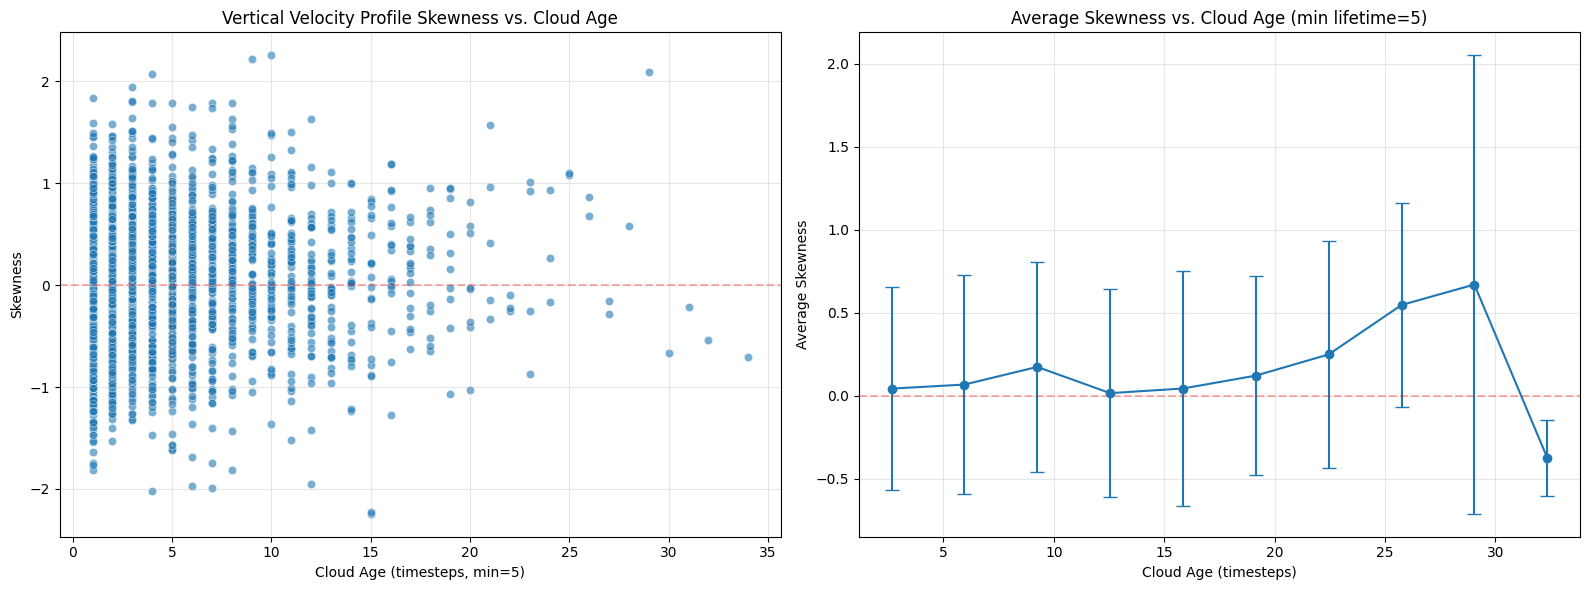

Total data points: 2709
Number of unique clouds: 791
Average skewness: 0.060 ± 0.626
Skewness range: [-2.244, 2.255]
Mean cloud depth: 200.9 meters


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import pandas as pd
import seaborn as sns

# ===== Configuration =====
nc_file = '../cloud_results.nc'
min_lifetime_timesteps = 5  # Filter clouds that live less than this many timesteps
# =========================

# Open the dataset
dataset = Dataset(nc_file, 'r')

# Get height levels - convert to numpy array
height_levels = np.array(dataset.variables['height'][:])

# First identify clouds with complete lifecycles AND minimum lifetime
valid_track = np.array(dataset.variables['valid_track'][:])
cloud_indices = np.arange(len(valid_track))

# Apply both filters - valid track and minimum lifetime
filtered_indices = []
for idx in cloud_indices:
    # Check if this is a valid track
    if valid_track[idx] != 1:
        continue
    
    # Calculate true lifetime (non-NaN age values)
    age_data = np.array(dataset.variables['age'][idx, :])
    valid_ages = age_data[~np.isnan(age_data)]
    
    # Count how many actual timesteps this cloud appears
    if len(valid_ages) >= min_lifetime_timesteps:
        filtered_indices.append(idx)

print(f"Total clouds: {len(valid_track)}")
print(f"Valid full lifecycle clouds: {np.sum(valid_track == 1)}")  
print(f"Clouds with min lifetime {min_lifetime_timesteps}: {len(filtered_indices)}")

# Create storage for results
results = []

# Process each qualifying cloud
for cloud_idx in filtered_indices:
    # Get cloud age data and find valid timesteps
    age_data = np.array(dataset.variables['age'][cloud_idx, :])
    valid_timesteps = np.where(~np.isnan(age_data))[0]
    
    valid_ages = age_data[~np.isnan(age_data)]
    max_age = np.max(valid_ages)
    
    # Process each timestep for this cloud
    for t in valid_timesteps:
        # Only include timesteps where age is greater than 0
        if age_data[t] <= 0:
            continue
            
        # Get vertical velocity profile for this cloud at this timestep
        w_profile = np.array(dataset.variables['w_per_level'][cloud_idx, t, :])
        
        # Skip timestep if w_profile contains mostly NaN values
        if np.isnan(w_profile).sum() > len(w_profile) - 3:
            continue
        
        # Find cloud base and top (first and last non-NaN values)
        valid_levels = ~np.isnan(w_profile)
        if not np.any(valid_levels):
            continue
            
        cloud_base_idx = np.argmax(valid_levels)
        cloud_top_idx = len(valid_levels) - 1 - np.argmax(valid_levels[::-1])
        
        # Extract only the cloud part of the profile
        cloud_w_profile = w_profile[cloud_base_idx:cloud_top_idx+1]
        cloud_heights = height_levels[cloud_base_idx:cloud_top_idx+1]
        
        # Ensure we have enough points for meaningful analysis
        if len(cloud_w_profile) < 3:
            continue
            
        # Normalize heights to 0-1
        if len(cloud_heights) > 1:
            normalized_heights = (cloud_heights - cloud_heights[0]) / (cloud_heights[-1] - cloud_heights[0])
        else:
            continue  # Skip if not enough points for normalization
            
        # Calculate skewness of the vertical velocity profile
        skewness = stats.skew(cloud_w_profile)
        
        # Get maximum vertical velocity for this cloud at this timestep
        max_w = np.array(dataset.variables['max_w'][cloud_idx, t])
        
        # Store results
        results.append({
            'cloud_id': int(cloud_idx),
            'age': float(age_data[t]),
            'skewness': float(skewness),
            'max_w': float(max_w),
            'cloud_depth': float(cloud_heights[-1] - cloud_heights[0]),
            'timestep': int(t),
            'profile_length': int(len(cloud_w_profile)),
            'max_age': float(max_age)
        })

# Close the dataset after extraction
dataset.close()

# Convert results to DataFrame
df = pd.DataFrame(results)

if len(df) == 0:
    print("No valid data points found. Try adjusting the filtering criteria.")
    exit()

print(f"Minimum age in filtered data: {df['age'].min()}")
print(f"Maximum age in filtered data: {df['age'].max()}")
print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")

# Create plots with only 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Skewness vs Age scatter plot
sns.scatterplot(data=df, x='age', y='skewness', alpha=0.6, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[0].set_title('Vertical Velocity Profile Skewness vs. Cloud Age')
axes[0].set_xlabel(f'Cloud Age (timesteps, min={min_lifetime_timesteps})')
axes[0].set_ylabel('Skewness')
axes[0].grid(True, alpha=0.3)

# Plot 2: Average skewness binned by age - using numpy histogram to avoid category issues
num_bins = 10
age_bins = np.linspace(df['age'].min(), df['age'].max(), num_bins + 1)
age_indices = np.digitize(df['age'], age_bins) - 1  # -1 to get 0-based indices
mean_skew = np.zeros(num_bins)
std_skew = np.zeros(num_bins)
bin_centers = (age_bins[:-1] + age_bins[1:]) / 2

for i in range(num_bins):
    bin_data = df['skewness'][age_indices == i]
    if len(bin_data) > 0:
        mean_skew[i] = bin_data.mean()
        std_skew[i] = bin_data.std() if len(bin_data) > 1 else 0

axes[1].errorbar(bin_centers, mean_skew, yerr=std_skew, fmt='o-', capsize=5)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[1].set_title(f'Average Skewness vs. Cloud Age (min lifetime={min_lifetime_timesteps})')
axes[1].set_xlabel('Cloud Age (timesteps)')
axes[1].set_ylabel('Average Skewness')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total data points: {len(df)}")
print(f"Number of unique clouds: {df['cloud_id'].nunique()}")
print(f"Average skewness: {df['skewness'].mean():.3f} ± {df['skewness'].std():.3f}")
print(f"Skewness range: [{df['skewness'].min():.3f}, {df['skewness'].max():.3f}]")
print(f"Mean cloud depth: {df['cloud_depth'].mean():.1f} meters")

## vertical velocity max against age

Total clouds: 10000
Valid full lifecycle clouds: 9500
Clouds with min lifetime 5: 9500
Minimum age in filtered data: 1.0
Maximum age in filtered data: 34.0
Age distribution: age
1.0     708
2.0     481
3.0     346
4.0     244
5.0     179
6.0     135
7.0     115
8.0      89
9.0      74
10.0     61
Name: count, dtype: int64


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_25282/3239636945.py:116: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")


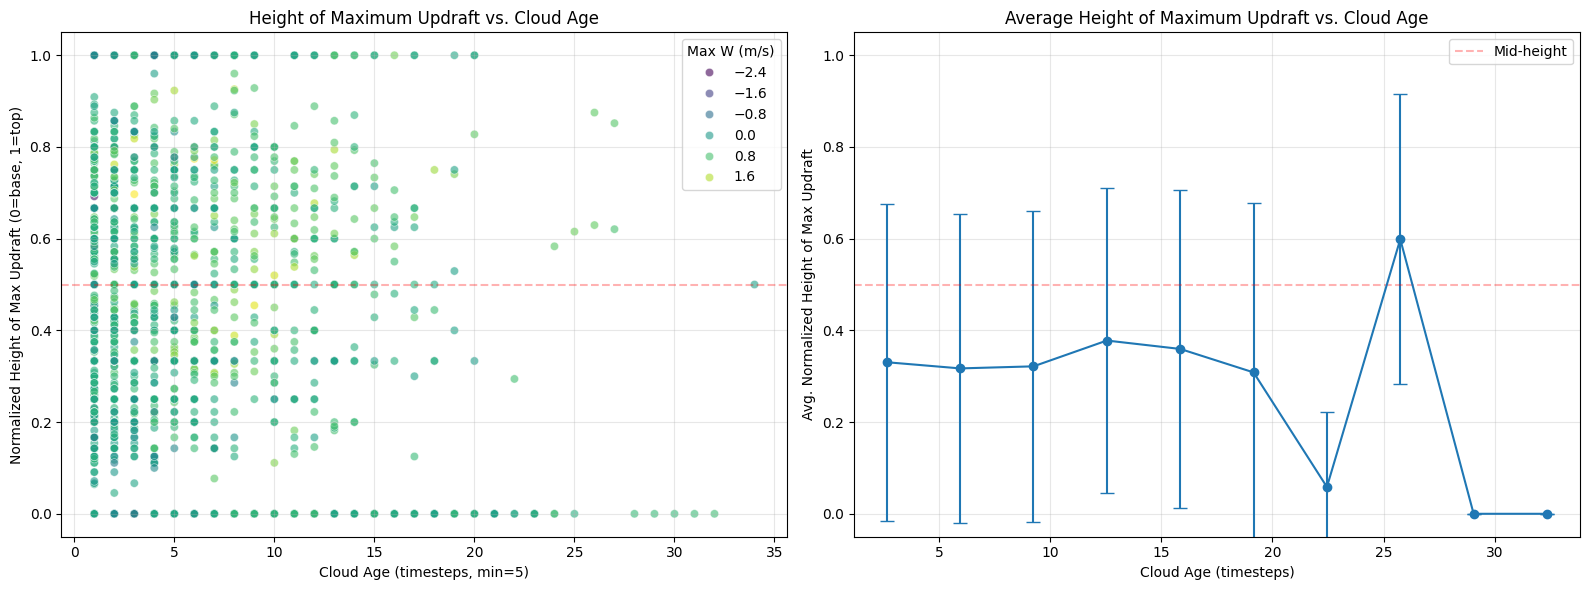

Total data points: 2709
Number of unique clouds: 791
Average normalized height of max W: 0.329 ± 0.343
Mean cloud depth: 200.9 meters

Distribution of max updraft height:
Early life (age <= 3.0): 0.334 ± 0.345
Late life (age > 3.0): 0.323 ± 0.341


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import seaborn as sns

# ===== Configuration =====
nc_file = '../cloud_results.nc'
min_lifetime_timesteps = 5  # Filter clouds that live less than this many timesteps
# =========================

# Open the dataset
dataset = Dataset(nc_file, 'r')

# Get height levels - convert to numpy array
height_levels = np.array(dataset.variables['height'][:])

# First identify clouds with complete lifecycles AND minimum lifetime
valid_track = np.array(dataset.variables['valid_track'][:])
cloud_indices = np.arange(len(valid_track))

# Apply both filters - valid track and minimum lifetime
filtered_indices = []
for idx in cloud_indices:
    # Check if this is a valid track
    if valid_track[idx] != 1:
        continue
    
    # Calculate true lifetime (non-NaN age values)
    age_data = np.array(dataset.variables['age'][idx, :])
    valid_ages = age_data[~np.isnan(age_data)]
    
    # Count how many actual timesteps this cloud appears
    if len(valid_ages) >= min_lifetime_timesteps:
        filtered_indices.append(idx)

print(f"Total clouds: {len(valid_track)}")
print(f"Valid full lifecycle clouds: {np.sum(valid_track == 1)}")  
print(f"Clouds with min lifetime {min_lifetime_timesteps}: {len(filtered_indices)}")

# Create storage for results
results = []

# Process each qualifying cloud
for cloud_idx in filtered_indices:
    # Get cloud age data and find valid timesteps
    age_data = np.array(dataset.variables['age'][cloud_idx, :])
    valid_timesteps = np.where(~np.isnan(age_data))[0]
    
    valid_ages = age_data[~np.isnan(age_data)]
    max_age = np.max(valid_ages)
    
    # Process each timestep for this cloud
    for t in valid_timesteps:
        # Only include timesteps where age is greater than 0
        if age_data[t] <= 0:
            continue
            
        # Get vertical velocity profile for this cloud at this timestep
        w_profile = np.array(dataset.variables['w_per_level'][cloud_idx, t, :])
        
        # Skip timestep if w_profile contains mostly NaN values
        if np.isnan(w_profile).sum() > len(w_profile) - 3:
            continue
        
        # Find cloud base and top (first and last non-NaN values)
        valid_levels = ~np.isnan(w_profile)
        if not np.any(valid_levels):
            continue
            
        cloud_base_idx = np.argmax(valid_levels)
        cloud_top_idx = len(valid_levels) - 1 - np.argmax(valid_levels[::-1])
        
        # Extract only the cloud part of the profile
        cloud_w_profile = w_profile[cloud_base_idx:cloud_top_idx+1]
        cloud_heights = height_levels[cloud_base_idx:cloud_top_idx+1]
        
        # Ensure we have enough points for meaningful analysis
        if len(cloud_w_profile) < 3:
            continue
            
        # Find the height of maximum vertical velocity
        max_w_idx = np.argmax(cloud_w_profile)
        max_w_value = cloud_w_profile[max_w_idx]
        max_w_height = cloud_heights[max_w_idx]
        
        # Normalize the height (0 = cloud base, 1 = cloud top)
        if len(cloud_heights) > 1:
            norm_max_w_height = (max_w_height - cloud_heights[0]) / (cloud_heights[-1] - cloud_heights[0])
        else:
            continue  # Skip if not enough points for normalization
        
        # Store results
        results.append({
            'cloud_id': int(cloud_idx),
            'age': float(age_data[t]),
            'max_w_norm_height': float(norm_max_w_height),  # Normalized height of max w
            'max_w': float(max_w_value),
            'cloud_depth': float(cloud_heights[-1] - cloud_heights[0]),
            'timestep': int(t),
            'max_age': float(max_age)
        })

# Close the dataset after extraction
dataset.close()

# Convert results to DataFrame
df = pd.DataFrame(results)

if len(df) == 0:
    print("No valid data points found. Try adjusting the filtering criteria.")
    exit()

print(f"Minimum age in filtered data: {df['age'].min()}")
print(f"Maximum age in filtered data: {df['age'].max()}")
print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")

# Create plots with only 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Normalized Height of Max W vs Age scatter plot
scatter = sns.scatterplot(data=df, x='age', y='max_w_norm_height', alpha=0.6, 
                          hue='max_w', palette='viridis', ax=axes[0])
axes[0].axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
axes[0].set_title('Height of Maximum Updraft vs. Cloud Age')
axes[0].set_xlabel(f'Cloud Age (timesteps, min={min_lifetime_timesteps})')
axes[0].set_ylabel('Normalized Height of Max Updraft (0=base, 1=top)')
axes[0].set_ylim(-0.05, 1.05)  # Add a small margin
axes[0].grid(True, alpha=0.3)
scatter.legend_.set_title('Max W (m/s)')

# Plot 2: Average normalized height binned by age
num_bins = 10
age_bins = np.linspace(df['age'].min(), df['age'].max(), num_bins + 1)
age_indices = np.digitize(df['age'], age_bins) - 1
mean_height = np.zeros(num_bins)
std_height = np.zeros(num_bins)
bin_centers = (age_bins[:-1] + age_bins[1:]) / 2

for i in range(num_bins):
    bin_data = df['max_w_norm_height'][age_indices == i]
    if len(bin_data) > 0:
        mean_height[i] = bin_data.mean()
        std_height[i] = bin_data.std() if len(bin_data) > 1 else 0

axes[1].errorbar(bin_centers, mean_height, yerr=std_height, fmt='o-', capsize=5)
axes[1].axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Mid-height')
axes[1].set_title(f'Average Height of Maximum Updraft vs. Cloud Age')
axes[1].set_xlabel('Cloud Age (timesteps)')
axes[1].set_ylabel('Avg. Normalized Height of Max Updraft')
axes[1].set_ylim(-0.05, 1.05)  # Add a small margin
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total data points: {len(df)}")
print(f"Number of unique clouds: {df['cloud_id'].nunique()}")
print(f"Average normalized height of max W: {df['max_w_norm_height'].mean():.3f} ± {df['max_w_norm_height'].std():.3f}")
print(f"Mean cloud depth: {df['cloud_depth'].mean():.1f} meters")

# Additional analysis: early vs. late life distributions
early_clouds = df[df['age'] <= df['age'].median()]
late_clouds = df[df['age'] > df['age'].median()]

print("\nDistribution of max updraft height:")
print(f"Early life (age <= {df['age'].median():.1f}): {early_clouds['max_w_norm_height'].mean():.3f} ± {early_clouds['max_w_norm_height'].std():.3f}")
print(f"Late life (age > {df['age'].median():.1f}): {late_clouds['max_w_norm_height'].mean():.3f} ± {late_clouds['max_w_norm_height'].std():.3f}")

Total clouds: 10000
Valid full lifecycle clouds: 9500
Clouds with min lifetime 5: 9500
Minimum age in filtered data: 1.0
Maximum age in filtered data: 34.0
Age distribution: age
1.0     708
2.0     481
3.0     346
4.0     244
5.0     179
6.0     135
7.0     115
8.0      89
9.0      74
10.0     61
Name: count, dtype: int64


/var/folders/s9/348b6n453lb4f4t0zsmgd28m0000gn/T/ipykernel_25282/2549132046.py:116: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")


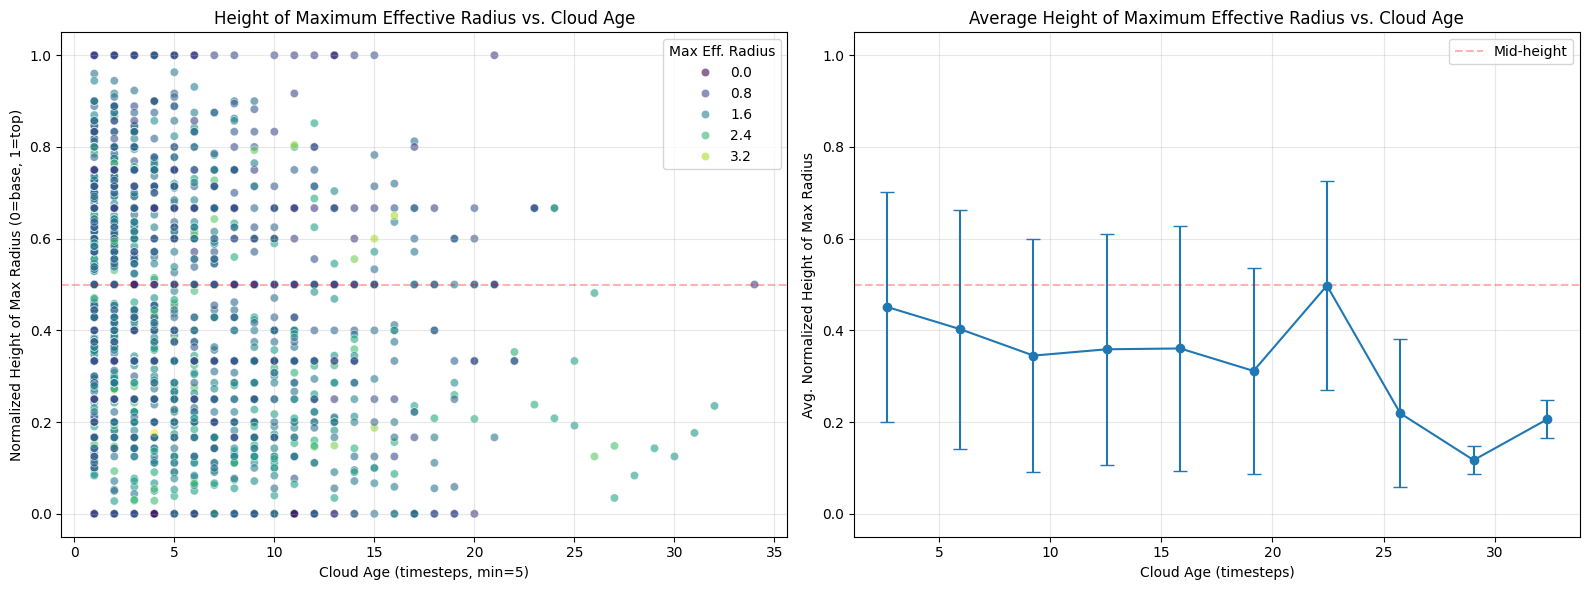

Total data points: 2709
Number of unique clouds: 791
Average normalized height of max radius: 0.425 ± 0.256
Mean cloud depth: 200.9 meters

Distribution of max effective radius height:
Early life (age <= 3.0): 0.458 ± 0.249
Late life (age > 3.0): 0.382 ± 0.258


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import seaborn as sns

# ===== Configuration =====
nc_file = '../cloud_results.nc'
min_lifetime_timesteps = 5  # Filter clouds that live less than this many timesteps
# =========================

# Open the dataset
dataset = Dataset(nc_file, 'r')

# Get height levels - convert to numpy array
height_levels = np.array(dataset.variables['height'][:])

# First identify clouds with complete lifecycles AND minimum lifetime
valid_track = np.array(dataset.variables['valid_track'][:])
cloud_indices = np.arange(len(valid_track))

# Apply both filters - valid track and minimum lifetime
filtered_indices = []
for idx in cloud_indices:
    # Check if this is a valid track
    if valid_track[idx] != 1:
        continue
    
    # Calculate true lifetime (non-NaN age values)
    age_data = np.array(dataset.variables['age'][idx, :])
    valid_ages = age_data[~np.isnan(age_data)]
    
    # Count how many actual timesteps this cloud appears
    if len(valid_ages) >= min_lifetime_timesteps:
        filtered_indices.append(idx)

print(f"Total clouds: {len(valid_track)}")
print(f"Valid full lifecycle clouds: {np.sum(valid_track == 1)}")  
print(f"Clouds with min lifetime {min_lifetime_timesteps}: {len(filtered_indices)}")

# Create storage for results
results = []

# Process each qualifying cloud
for cloud_idx in filtered_indices:
    # Get cloud age data and find valid timesteps
    age_data = np.array(dataset.variables['age'][cloud_idx, :])
    valid_timesteps = np.where(~np.isnan(age_data))[0]
    
    valid_ages = age_data[~np.isnan(age_data)]
    max_age = np.max(valid_ages)
    
    # Process each timestep for this cloud
    for t in valid_timesteps:
        # Only include timesteps where age is greater than 0
        if age_data[t] <= 0:
            continue
            
        # Get effective radius profile for this cloud at this timestep
        radius_profile = np.array(dataset.variables['eff_radius_per_level'][cloud_idx, t, :])
        
        # Skip timestep if radius_profile contains mostly NaN values
        if np.isnan(radius_profile).sum() > len(radius_profile) - 3:
            continue
        
        # Find cloud base and top (first and last non-NaN values)
        valid_levels = ~np.isnan(radius_profile)
        if not np.any(valid_levels):
            continue
            
        cloud_base_idx = np.argmax(valid_levels)
        cloud_top_idx = len(valid_levels) - 1 - np.argmax(valid_levels[::-1])
        
        # Extract only the cloud part of the profile
        cloud_radius_profile = radius_profile[cloud_base_idx:cloud_top_idx+1]
        cloud_heights = height_levels[cloud_base_idx:cloud_top_idx+1]
        
        # Ensure we have enough points for meaningful analysis
        if len(cloud_radius_profile) < 3:
            continue
            
        # Find the height of maximum effective radius
        max_radius_idx = np.argmax(cloud_radius_profile)
        max_radius_value = cloud_radius_profile[max_radius_idx]
        max_radius_height = cloud_heights[max_radius_idx]
        
        # Normalize the height (0 = cloud base, 1 = cloud top)
        if len(cloud_heights) > 1:
            norm_max_radius_height = (max_radius_height - cloud_heights[0]) / (cloud_heights[-1] - cloud_heights[0])
        else:
            continue  # Skip if not enough points for normalization
        
        # Store results
        results.append({
            'cloud_id': int(cloud_idx),
            'age': float(age_data[t]),
            'max_radius_norm_height': float(norm_max_radius_height),  # Normalized height of max radius
            'max_radius': float(max_radius_value),
            'cloud_depth': float(cloud_heights[-1] - cloud_heights[0]),
            'timestep': int(t),
            'max_age': float(max_age)
        })

# Close the dataset after extraction
dataset.close()

# Convert results to DataFrame
df = pd.DataFrame(results)

if len(df) == 0:
    print("No valid data points found. Try adjusting the filtering criteria.")
    exit()

print(f"Minimum age in filtered data: {df['age'].min()}")
print(f"Maximum age in filtered data: {df['age'].max()}")
print(f"Age distribution: {df['age'].value_counts().sort_index()[:10]}")

# Create plots with only 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Normalized Height of Max Effective Radius vs Age scatter plot
scatter = sns.scatterplot(data=df, x='age', y='max_radius_norm_height', alpha=0.6, 
                          hue='max_radius', palette='viridis', ax=axes[0])
axes[0].axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
axes[0].set_title('Height of Maximum Effective Radius vs. Cloud Age')
axes[0].set_xlabel(f'Cloud Age (timesteps, min={min_lifetime_timesteps})')
axes[0].set_ylabel('Normalized Height of Max Radius (0=base, 1=top)')
axes[0].set_ylim(-0.05, 1.05)  # Add a small margin
axes[0].grid(True, alpha=0.3)
scatter.legend_.set_title('Max Eff. Radius')

# Plot 2: Average normalized height binned by age
num_bins = 10
age_bins = np.linspace(df['age'].min(), df['age'].max(), num_bins + 1)
age_indices = np.digitize(df['age'], age_bins) - 1
mean_height = np.zeros(num_bins)
std_height = np.zeros(num_bins)
bin_centers = (age_bins[:-1] + age_bins[1:]) / 2

for i in range(num_bins):
    bin_data = df['max_radius_norm_height'][age_indices == i]
    if len(bin_data) > 0:
        mean_height[i] = bin_data.mean()
        std_height[i] = bin_data.std() if len(bin_data) > 1 else 0

axes[1].errorbar(bin_centers, mean_height, yerr=std_height, fmt='o-', capsize=5)
axes[1].axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Mid-height')
axes[1].set_title(f'Average Height of Maximum Effective Radius vs. Cloud Age')
axes[1].set_xlabel('Cloud Age (timesteps)')
axes[1].set_ylabel('Avg. Normalized Height of Max Radius')
axes[1].set_ylim(-0.05, 1.05)  # Add a small margin
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total data points: {len(df)}")
print(f"Number of unique clouds: {df['cloud_id'].nunique()}")
print(f"Average normalized height of max radius: {df['max_radius_norm_height'].mean():.3f} ± {df['max_radius_norm_height'].std():.3f}")
print(f"Mean cloud depth: {df['cloud_depth'].mean():.1f} meters")

# Additional analysis: early vs. late life distributions
early_clouds = df[df['age'] <= df['age'].median()]
late_clouds = df[df['age'] > df['age'].median()]

print("\nDistribution of max effective radius height:")
print(f"Early life (age <= {df['age'].median():.1f}): {early_clouds['max_radius_norm_height'].mean():.3f} ± {early_clouds['max_radius_norm_height'].std():.3f}")
print(f"Late life (age > {df['age'].median():.1f}): {late_clouds['max_radius_norm_height'].mean():.3f} ± {late_clouds['max_radius_norm_height'].std():.3f}")